In [1]:
#Establish sql connection to connect to the database
import mysql.connector as conn
connection = conn.connect(host='localhost', user='root', passwd='12345')
print(connection)

In [3]:
#python modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [4]:
#load dim_customer table as a dataframe
cust_df = pd.read_sql("Select * from gdb041.dim_customer", connection)
cust_df.head()

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC


In [54]:
#load dim_product table as a dataframe
prod_df = pd.read_sql("Select * from gdb041.dim_product", connection)
prod_df.head()

,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard


In [6]:
#load fact_gross_price table as a dataframe
price_df = pd.read_sql("Select * from gdb041.fact_gross_price", connection)
price_df.head()

,product_code,fiscal_year,gross_price
0,A0118150101,2020,16.2323
1,A0118150101,2021,19.0573
2,A0118150102,2020,19.8577
3,A0118150102,2021,21.4565
4,A0118150103,2020,22.1317


In [7]:
#load fact_manufacturing_cost table as a dataframe
cost_df = pd.read_sql("Select * from gdb041.fact_manufacturing_cost", connection)
cost_df.head()

,product_code,cost_year,manufacturing_cost
0,A0118150101,2020,5.0207
1,A0118150101,2021,5.5172
2,A0118150102,2020,5.7180
3,A0118150102,2021,6.2835
4,A0118150103,2020,6.3264


In [8]:
#load fact_pre_invoice_deductions table as a dataframe
invded_df = pd.read_sql("Select * from gdb041.fact_pre_invoice_deductions", connection)
invded_df.head()

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2020,0.0735
1,70002017,2021,0.0703
2,70002018,2020,0.2255
3,70002018,2021,0.2061
4,70003181,2020,0.0531


In [55]:
#load fact_sales_monthly table as a dataframe
sales_df = pd.read_sql("Select * from gdb041.fact_sales_monthly", connection)
sales_df.head()

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2019-09-01,A0118150101,70002017,137,2020
1,2019-09-01,A0118150101,70002018,47,2020
2,2019-09-01,A0118150101,70003181,57,2020
3,2019-09-01,A0118150101,70003182,63,2020
4,2019-09-01,A0118150101,70004069,9,2020


## Provide the list of markets in which customer "Atliq Exclusive" operates its business in the APAC region.


In [10]:
atliq_df = cust_df['market'].loc[(cust_df['customer'] == 'Atliq Exclusive') & (cust_df['region'] == 'APAC')]
atliq_df = atliq_df.drop_duplicates()
atliq_df

0           India
2       Indonesia
4           Japan
7     Philiphines
9     South Korea
11      Australia
13     Newzealand
15     Bangladesh
Name: market, dtype: object

In [11]:
import folium

india = [20.5937, 78.9629]
bangladesh = [23.6850, 90.3563]
indonesia = [-0.7893, 113.9213]
japan = [36.2048, 138.2529]
philippines = [12.8797, 121.7740]
south_korea = [37.5665, 126.9780]
australia = [-25.2744, 133.7751]
new_zealand = [-40.9006, 174.8860]

m = folium.Map(location=[20, 78], tiles="cartodbpositron", zoom_start=2)

folium.Marker(india, popup='India').add_to(m)
folium.Marker(bangladesh, popup='Bangladesh').add_to(m)
folium.Marker(indonesia, popup='Indonesia').add_to(m)
folium.Marker(japan, popup='Japan').add_to(m)
folium.Marker(philippines, popup='Philippines').add_to(m)
folium.Marker(south_korea, popup='South Korea').add_to(m)
folium.Marker(australia, popup='Australia').add_to(m)
folium.Marker(new_zealand, popup='New Zealand').add_to(m)

m.save("map.html")
m

## What is the percentage of unique product increase in 2021 vs. 2020? 
### final output contains these fields,
### unique_products_2020
### unique_products_2021
### percentage_chg

In [12]:
# Get unique product codes for 2020 and 2021
unique_products_2020 = sales_df['product_code'].loc[(sales_df['fiscal_year'] == 2020)].nunique()
unique_products_2021 = sales_df['product_code'].loc[(sales_df['fiscal_year'] == 2021)].nunique()

# Calculate percentage change
percentage_chg = ((unique_products_2021 - unique_products_2020) / unique_products_2020) * 100

# Create a dataframe with the results
result = pd.DataFrame({'unique_products_2020': [unique_products_2020], 'unique_products_2021': [unique_products_2021], 'percentage_chg': [percentage_chg]})

print(result)

   unique_products_2020  unique_products_2021  percentage_chg
0                   245                   334       36.326531


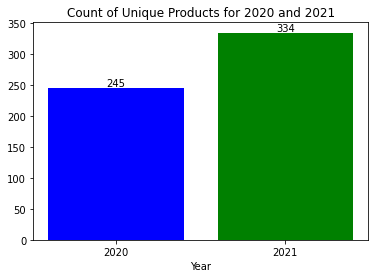

In [27]:
# Create figure and axes objects
fig, ax = plt.subplots()

# Get the data
x = ['2020', '2021']
y = [unique_products_2020, unique_products_2021]

# Define colors for the bars
colors = ['blue', 'green']

# Plot the data
rects = ax.bar(x, y, color=colors)

# Add labels and title
ax.set_xlabel('Year')
ax.set_title('Count of Unique Products for 2020 and 2021')

# Add data labels to the bars
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Show the plot
plt.show()

## Provide a report with all the unique product counts for each segment and sort them in descending order of product counts. 
### The final output contains 2 fields--segment and product_count

In [14]:
segment_product_count = prod_df.groupby('segment', as_index=False)['product_code'].nunique().sort_values(by='product_code',ascending=False)
segment_product_count

,segment,product_code
3,Notebook,129
0,Accessories,116
4,Peripherals,84
1,Desktop,32
5,Storage,27
2,Networking,9


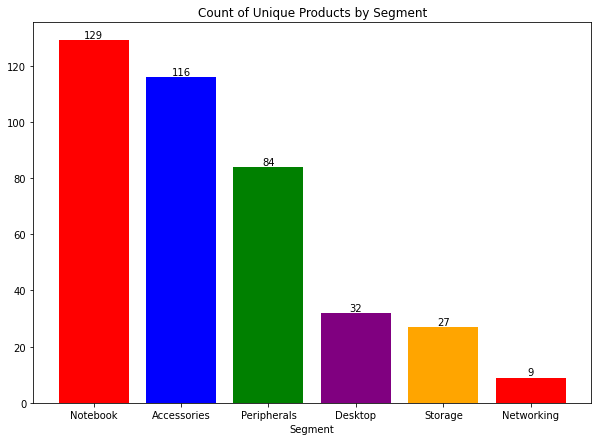

In [28]:
# Create figure and axes objects
fig, ax = plt.subplots(figsize=(10, 7))

# Get the data
x = segment_product_count['segment']
y = segment_product_count['product_code']

# Define colors for the bars
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Plot the data
rects = ax.bar(x, y, color=colors)

# Add labels and title
ax.set_xlabel('Segment')
ax.set_title('Count of Unique Products by Segment')

# Add data labels to the bars
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Show the plot
plt.show()

# Which segment had the most increase in unique products in
## 2021 vs 2020? The final output contains these fields,
### segment
### product_count_2020
### product_count_2021
### difference

In [16]:
new_df = prod_df.merge(sales_df[['product_code','fiscal_year']]).drop(columns=['division', 'category', 'product', 'variant'])
new_df = new_df.groupby(['segment','fiscal_year'], as_index=False).nunique()
new_df = new_df.groupby('segment', as_index=False).agg(pd.Series.tolist)
new_df[['product_count_2020','product_count_2021']] = pd.DataFrame(new_df.product_code.tolist(), index= new_df.index)
new_df = new_df.drop(columns=['fiscal_year', 'product_code'])
new_df['difference'] = new_df['product_count_2021'] - new_df['product_count_2020'] 
new_df

,segment,product_count_2020,product_count_2021,difference
0,Accessories,69,103,34
1,Desktop,7,22,15
2,Networking,6,9,3
3,Notebook,92,108,16
4,Peripherals,59,75,16
5,Storage,12,17,5


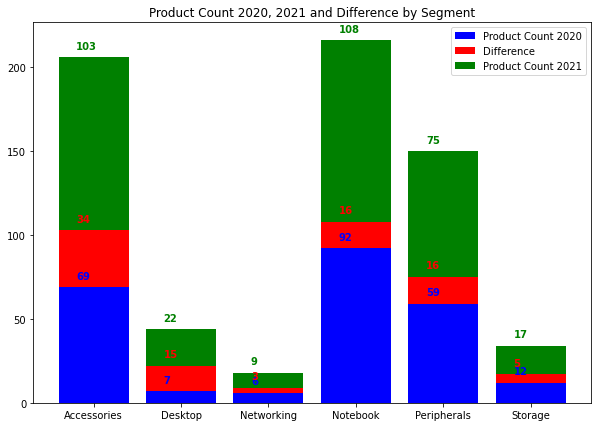

In [17]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(new_df['segment'], new_df['product_count_2020'], color='b', label='Product Count 2020')
ax.bar(new_df['segment'], new_df['difference'], bottom=new_df['product_count_2020'], color='r', label='Difference')
ax.bar(new_df['segment'], new_df['product_count_2021'], bottom=new_df['product_count_2020'] + new_df['difference'], color='g', label='Product Count 2021')

# Add data labels
for i, v in enumerate(new_df['product_count_2020']):
    ax.text(i - 0.2, v + 5, str(v), color='blue', fontweight='bold')
for i, v in enumerate(new_df['difference']):
    ax.text(i - 0.2, v + new_df['product_count_2020'][i] + 5, str(v), color='red', fontweight='bold')
for i, v in enumerate(new_df['product_count_2021']):
    ax.text(i - 0.2, v + new_df['product_count_2020'][i] + new_df['difference'][i] + 5, str(v), color='green', fontweight='bold')

# Add labels and title
#ax.set_xlabel('Segment')
#ax.set_ylabel('Product Count')
plt.title('Product Count 2020, 2021 and Difference by Segment')

# Add legend
ax.legend(loc='upper right')

plt.show()

# Get the products that have the highest and lowest manufacturing costs.
## The final output should contain these fields,
### product_code
### product
### manufacturing_cost


In [18]:
manf_df = prod_df.merge(cost_df[['product_code','manufacturing_cost']]).drop(columns=['division', 'category', 'segment', 'variant'])
prod_man_df = manf_df.loc[[manf_df['manufacturing_cost'].idxmax(), manf_df['manufacturing_cost'].idxmin()]]
print(prod_man_df)

    product_code                product  manufacturing_cost
534  A6120110206   AQ HOME Allin1 Gen 2            240.5364
134  A2118150101  AQ Master wired x1 Ms              0.8920


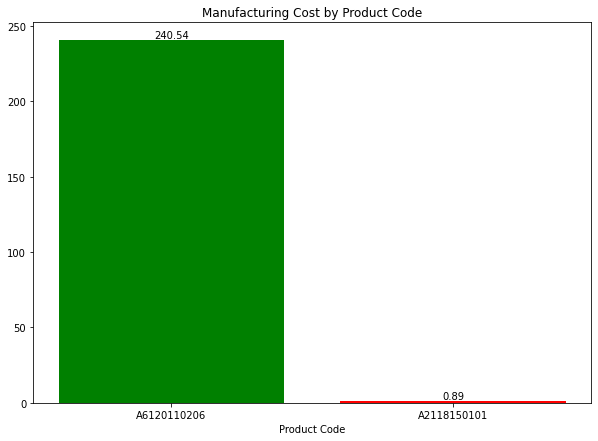

In [29]:
# Define figure size
fig, ax = plt.subplots(figsize=(10, 7))

# Get the data
x = prod_man_df['product_code']
y = prod_man_df['manufacturing_cost']

# Define colors for the bars
colors = ['green', 'red']

# Plot the data
rects = ax.bar(x, y, color=colors)

# Add labels and title
ax.set_xlabel('Product Code')
ax.set_title('Manufacturing Cost by Product Code')

# Add data labels to the bars
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()

# Generate a report which contains the top 5 customers who received an average high pre_invoice_discount_pct for the fiscal year 2021 and in the Indian market. The final output contains these fields,
### customer_code
### customer
### average_discount_percentage

In [20]:
df = cust_df.merge(invded_df, on='customer_code')
df = df.loc[(df['fiscal_year'] == 2021)& (df['market'] == 'India')]
df=df.groupby(["customer_code", "customer"], as_index=False)["pre_invoice_discount_pct"].mean()
df = df.rename(columns={"pre_invoice_discount_pct": "average_discount_percentage"})
df = df.sort_values("average_discount_percentage", ascending=False)
top_5 = df.head(5)
top_5

,customer_code,customer,average_discount_percentage
10,90002009,Flipkart,0.3083
7,90002006,Viveks,0.3038
4,90002003,Ezone,0.3028
3,90002002,Croma,0.3025
17,90002016,Amazon,0.2933


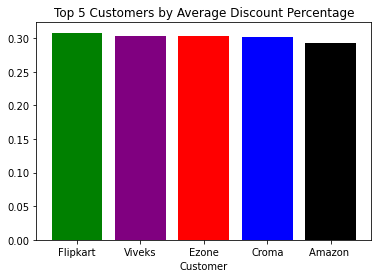

In [30]:
colors=['green', 'purple', 'red', 'blue', 'black']
plt.bar(top_5['customer'], top_5['average_discount_percentage'], color=colors)
plt.xlabel('Customer')
plt.title('Top 5 Customers by Average Discount Percentage')
plt.show()

# In which quarter of 2020, got the maximum total_sold_quantity? The final output contains these fields sorted by the total_sold_quantity,
## Quarter
## total_sold_quantity


In [35]:
sales_df['date'] = pd.to_datetime(sales_df['date'])
sales_df = sales_df.groupby(sales_df['date'].dt.to_period('Q'))['sold_quantity'].sum().sort_values(ascending=False).reset_index().rename(columns={'sold_quantity': 'Total_Sold_Quantity','date':'Quarter'})
sales_df.head(1)

,Quarter,Total_Sold_Quantity
0,2020Q4,17447125


In Q4 of 2020 got the max sold quantity  

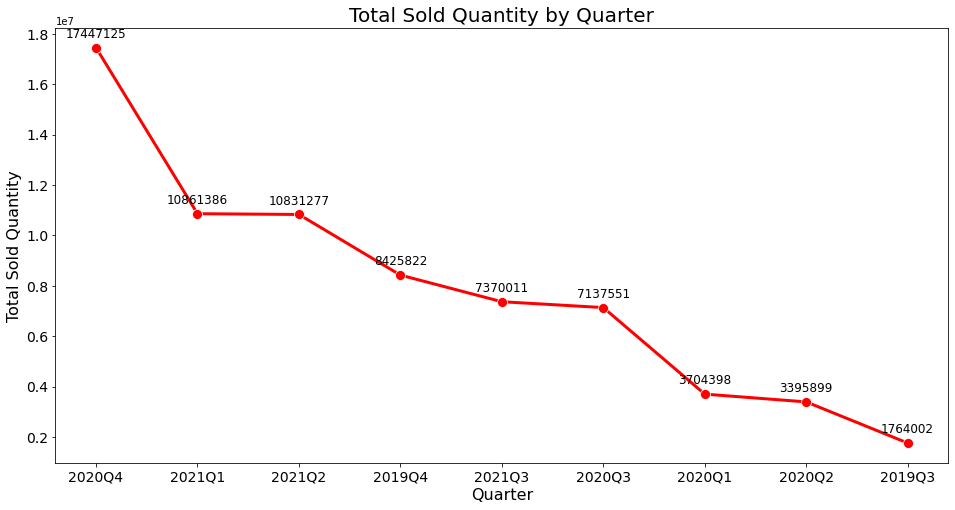

In [52]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(x=sales_df['Quarter'].astype(str), y=sales_df['Total_Sold_Quantity'], linewidth=3, color='red', marker='o', markersize=10)
ax.set_xlabel('Quarter', fontsize=16)
ax.set_ylabel('Total Sold Quantity', fontsize=16)
ax.set_title('Total Sold Quantity by Quarter', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)

# Add data labels
for x, y in zip(sales_df['Quarter'].astype(str), sales_df['Total_Sold_Quantity']):
    ax.annotate("{:.0f}".format(y), (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)

plt.show()

# Get the Top 3 products in each division that have a high total_sold_quantity in the fiscal_year 2021? The final output contains these fields,
## division
## product_code
## product
## total_sold_quantity
## rank_order

In [56]:
merged_df = pd.merge(prod_df, sales_df, on = ['product_code'])
merged_df = merged_df[['division', 'product_code', 'product', 'sold_quantity','fiscal_year']]
merged_df = merged_df.loc[(merged_df['fiscal_year'] == 2021)]
merged_df = merged_df.groupby(['product_code','product','division','fiscal_year'], as_index=False)['sold_quantity'].sum().sort_values(by=['sold_quantity'],ascending=False).rename(columns={'sold_quantity': 'Total_Sold_Quantity'})
merged_df = merged_df.groupby(['division'], as_index=False).apply(lambda x: x[x.Total_Sold_Quantity == x.Total_Sold_Quantity.max()]).reset_index(drop=True)
merged_df['rank_order'] = merged_df.sort_values('Total_Sold_Quantity', ascending=False).reset_index(drop=True).index+1
merged_df

,product_code,product,division,fiscal_year,Total_Sold_Quantity,rank_order
0,A6720160103,AQ Pen Drive 2 IN 1,N & S,2021,701373,1
1,A2319150302,AQ Gamers Ms,P & A,2021,428498,2
2,A4218110202,AQ Digit,PC,2021,17434,3


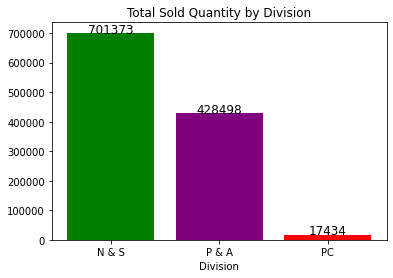

In [59]:
colors=['green', 'purple', 'red']
plt.bar(merged_df['division'], merged_df['Total_Sold_Quantity'], color=colors)
plt.xlabel('Division')
plt.title('Total Sold Quantity by Division')

# Add data labels
for i, value in enumerate(merged_df['Total_Sold_Quantity']):
    plt.text(i, value, str(value), ha='center', fontsize=12)

plt.show()